In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate


from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 

import numpy as np
from math import pi

In [2]:
def grover_d():
    qc = QuantumCircuit(3)
    #Diffusor
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(0)
    qc.ccx(1,2,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1,2])
    qc.h([0,1,2])
    #Corrrect the sign, in this contex required...
    qc.rz(2*pi,0)
    qc.rz(2*pi,1)
    qc.rz(2*pi,2)


    qc.name="G"
    return qc

In [3]:
def grover_u():
    qc = QuantumCircuit(2)
    #Diffusor
    qc.h([0,1])
    qc.x([0,1])
    qc.h(0)
    qc.cx(1,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1])
    qc.h([0,1])

    qc.name="G"
    return qc

In [4]:
def oracle1_d():
    qc = QuantumCircuit(4)
    qc.x(2)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(2)
    qc.name="h1"
    return qc
    

In [5]:
def oracle2_d():
    qc = QuantumCircuit(4)
    qc.x(1)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(1)
    qc.name="h2"
    return qc

In [6]:
def oracle2_u():
    qc = QuantumCircuit(3)
    qc.x(0)
    gate = MCXGate(2)
    qc.append(gate, [0, 1, 2])
    qc.x(0)
    qc.name="O2"
    return qc

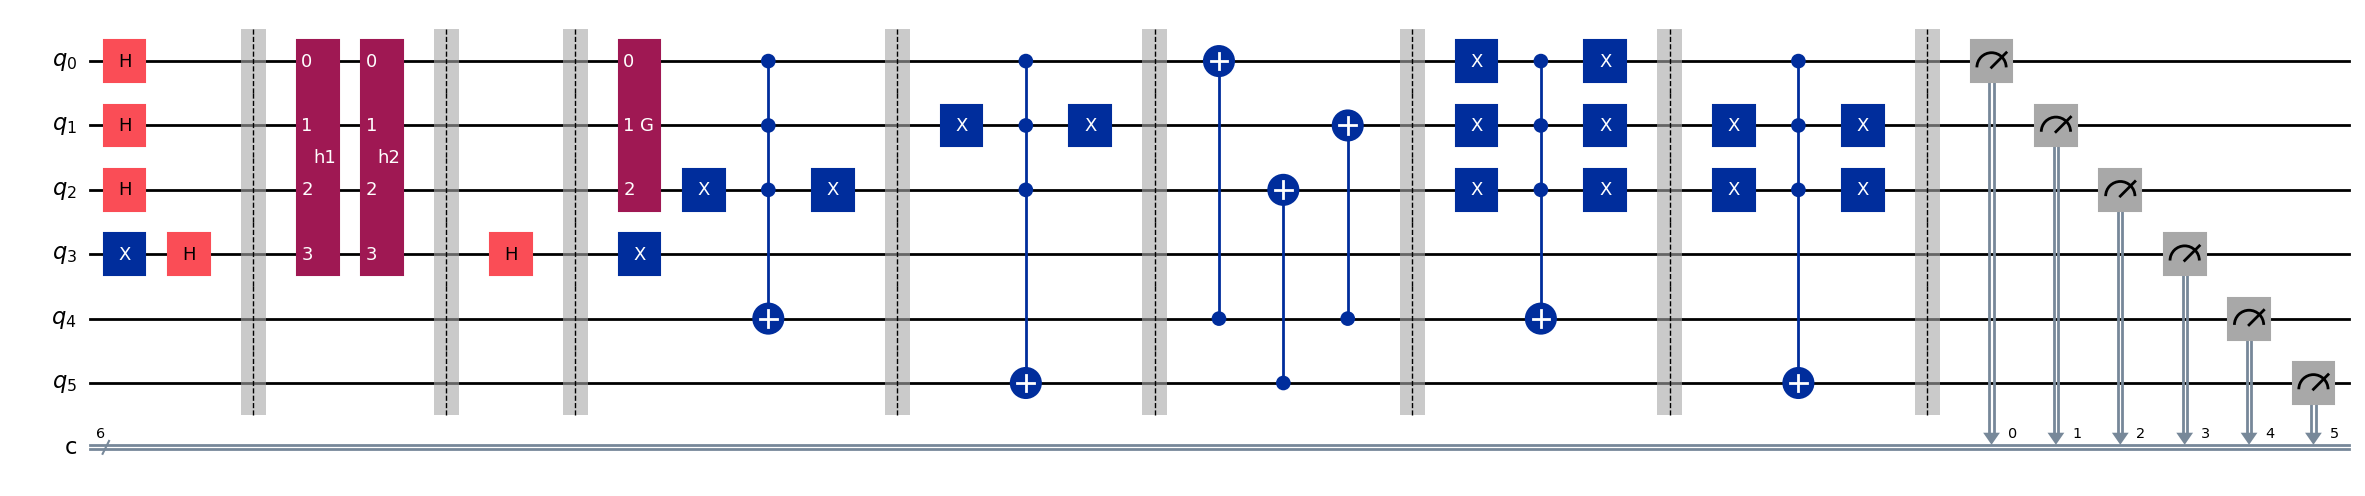

In [7]:
from qiskit.circuit.library import UnitaryGate

qc = QuantumCircuit(6,6)
#Preparation
qc.h([0,1,2])

#Preparation of Aux
qc.x(3)
qc.h(3)

P = [[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 
  0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 1,
   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 
  1]] 

PermutationGate = UnitaryGate(P)

qc.barrier()
qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))


qc.barrier()
qc.h(3)

qc.barrier()

qc.x(3)
qc.append(grover_d(),range(3))


#qc.append(PermutationGate, [0, 1, 2])

#orale1 and 2 down

qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 4])
qc.x(2)

qc.barrier()

qc.x(1)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 5])
qc.x(1)

qc.barrier()

#Anti Oracle
qc.cx(4,0)
qc.cx(4,1)
qc.cx(5,2)


qc.barrier()

qc.x(0)
qc.x(1)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 4])
qc.x(0)
qc.x(1)
qc.x(2)

qc.barrier()

qc.x(1)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 5])
qc.x(1)
qc.x(2)

!

#qc.append(PermutationGate, [0, 1, 2]).inverse()

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)


qc.draw('mpl',fold=240)


Total count are: {'000001': 4985, '000000': 5015}


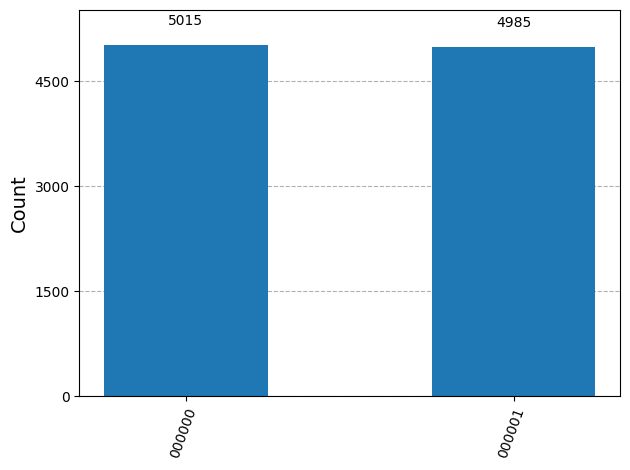

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

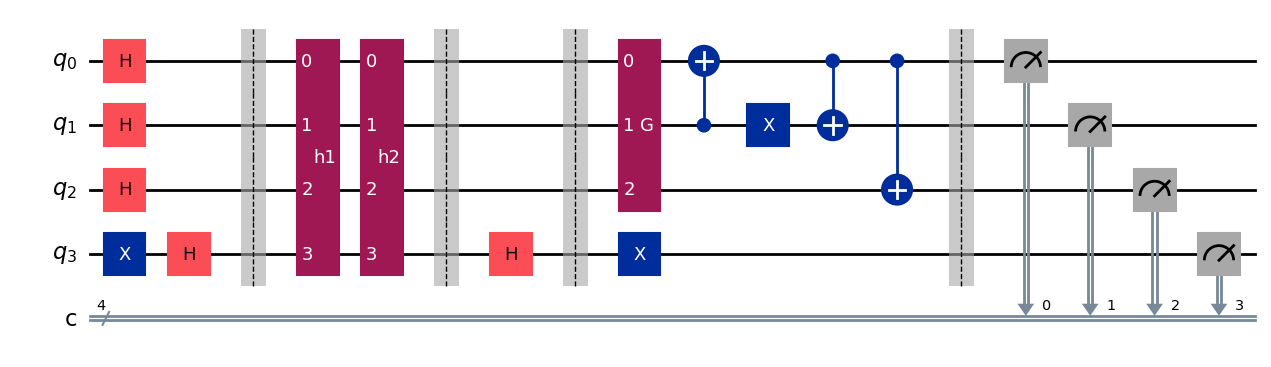

In [9]:
from qiskit.circuit.library import UnitaryGate

qc = QuantumCircuit(4,4)
#Preparation
qc.h([0,1,2])

#Preparation of Aux
qc.x(3)
qc.h(3)

P = [[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 
  0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 1,
   0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 
  1]] 

PermutationGate = UnitaryGate(P)

qc.barrier()
qc.append(oracle1_d(),range(4))
qc.append(oracle2_d(),range(4))


qc.barrier()
qc.h(3)

qc.barrier()

qc.x(3)
qc.append(grover_d(),range(3))


#qc.append(PermutationGate, [0, 1, 2])

qc.cx(1,0)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)

#qc.append(PermutationGate, [0, 1, 2]).inverse()

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

qc.draw('mpl')


Total count are: {'0001': 4958, '0000': 5042}


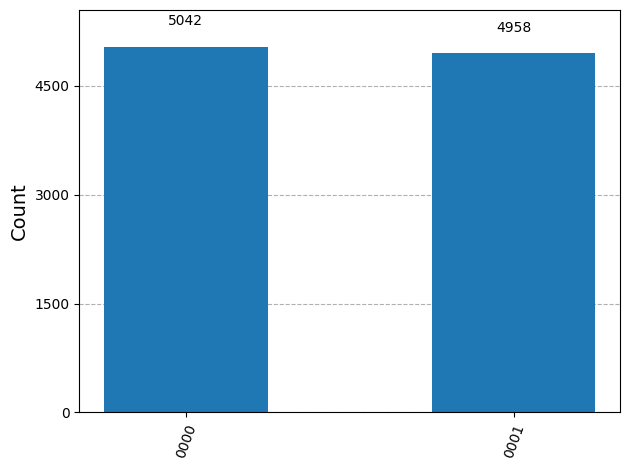

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

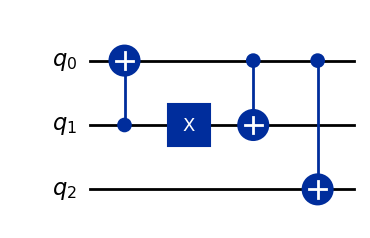

In [11]:
qc = QuantumCircuit(3)

qc.cx(1,0)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)


qc.draw('mpl')

In [12]:
from qiskit.visualization import array_to_latex

simulator = Aer.get_backend('qasm_simulator')
qc.save_unitary()
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("\nSize of the unitary matrix:",np.asarray(unitary).shape)
array_to_latex(unitary, prefix="\\text{Lambda = }\n")


Size of the unitary matrix: (8, 8)


<IPython.core.display.Latex object>